In [1]:
#현재 mmdetection이 pytorch 2.x를 지원하지 않음. pytorch 1.13+ CUDA 116 환경으로 코랩 커널 downgrade
# downgrade 설치시 ERROR: pip's dependency resolver... 부분은 신경쓰지 않아도 됨. 
!pip install torch==1.13.0+cu116 torchvision==0.14.0+cu116 --extra-index-url https://download.pytorch.org/whl/cu116

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/, https://download.pytorch.org/whl/cu116
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 GB 706.8 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.2/24.2 MB 53.5 MB/s eta 0:00:00
  Attempting uninstall: torch
    Found existing installation: torch 2.0.0+cu118
    Uninstalling torch-2.0.0+cu118:
      Successfully uninstalled torch-2.0.0+cu118
  Attempting uninstall: torchvision
    Found existing installation: torchvision 0.15.1+cu118
    Uninstalling torchvision-0.15.1+cu118:
      Successfully uninstalled torchvision-0.15.1+cu118
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
torchtext 0.15.1 requires torch==2.0.0, but you have torch 1.13.0+cu116 which is incompatible.
torchdata 0.6.0 requires torch==2.0.0, but you have torch 1.13.0+cu116 

In [2]:
# mmcv를 위해서 mmcv-full을 먼저 설치해야 함. https://mmcv.readthedocs.io/en/latest/get_started/installation.html 설치 과정 참조.
!pip install mmcv-full -f https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu116/torch1.13/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 MB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.9/200.9 kB 10.9 MB/s eta 0:00:00


In [3]:
# 2023년 4월 6일 기준으로 mmdetection이 3.0으로 upgrade됨. 실습 코드는 mmdetection 2.x 기준임. 
# mmdetection 2.x branch의 소스코드 기반으로 mmdetection 설치 필요. 
!git clone --branch 2.x https://github.com/open-mmlab/mmdetection.git
!cd mmdetection; python setup.py install

Cloning into 'mmdetection'...
remote: Enumerating objects: 35370, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 35370 (delta 8), reused 30 (delta 4), pack-reused 35308
Receiving objects: 100% (35370/35370), 47.26 MiB | 21.90 MiB/s, done.
Resolving deltas: 100% (24932/24932), done.
No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
running install
/usr/local/lib/python3.9/dist-packages/setuptools/command/install.py:34: SetuptoolsDeprecationWarning: setup.py install is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/setuptools/command/easy_install.py:144: EasyInstallDeprecationWarning: easy_install command is deprecated. Use build and pip and other standards-based tools.
  warnings.warn(
running bdist_egg
running egg_info
creating mmdet.egg-info
writing mmdet.egg-info/PKG-INFO
writing dependency_links to mmdet.egg-info/dependency_links.txt
w

In [1]:
# 아래를 수행하기 전에 kernel을 restart 해야 함. 
from mmdet.apis import init_detector, inference_detector
import mmcv

No CUDA runtime is found, using CUDA_HOME='/usr/local/cuda'
/usr/local/lib/python3.9/dist-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


# KIITI Tiny Dataset 다운로드

In [3]:
!wget https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
!unzip kitti_tiny.zip > /dev/null

--2023-04-23 23:17:15--  https://download.openmmlab.com/mmdetection/data/kitti_tiny.zip
Resolving download.openmmlab.com (download.openmmlab.com)... 47.246.48.205, 47.246.48.208, 47.246.48.204, ...
Connecting to download.openmmlab.com (download.openmmlab.com)|47.246.48.205|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6918271 (6.6M) [application/zip]
Saving to: ‘kitti_tiny.zip’

kitti_tiny.zip      100%[===================>]   6.60M  31.0MB/s    in 0.2s    

2023-04-23 23:17:16 (31.0 MB/s) - ‘kitti_tiny.zip’ saved [6918271/6918271]



# KITTI DATA FORMAT

* KITTI DATA SET 파일 구조는 annotation 각 이미지 파일마다 각각 구성되어있음.
* but mmdetection에서는 annotation 파일이 하나만 있기를 바라는 구조이므로 FORMAT을 변경해 줘야 함
* 첫번째 컬럼은 label 값
* 5 ~ 8번째 컬럼 bbox 좌표값

In [4]:
!cat /content/kitti_tiny/training/label_2/000068.txt

Car 0.25 0 1.94 69.26 200.28 435.08 374.00 1.46 1.62 4.04 -3.00 1.79 6.98 1.55
Car 0.80 1 2.26 0.00 209.20 198.59 374.00 1.46 1.58 3.72 -5.44 1.85 6.22 1.56
Cyclist 0.97 0 2.34 1210.28 199.77 1241.00 374.00 1.55 0.57 1.73 4.04 1.69 3.57 -3.14
Car 0.00 2 1.68 478.18 187.68 549.54 249.43 1.57 1.60 3.99 -2.73 2.03 20.96 1.55
Car 0.00 1 1.66 530.03 187.79 573.10 226.09 1.52 1.54 3.68 -2.53 2.20 31.50 1.58
Van 0.00 1 1.63 547.61 171.12 584.05 212.41 2.47 1.98 5.81 -2.79 2.41 46.44 1.57
Car 0.00 1 -0.16 667.74 182.35 790.82 230.38 1.62 1.65 4.14 4.19 1.99 25.95 0.00
Car 0.00 2 -0.11 657.37 184.48 763.34 221.64 1.55 1.66 4.47 4.35 2.10 32.00 0.02
Car 0.00 1 -0.01 637.45 180.34 714.44 212.34 1.69 1.76 4.12 3.59 2.12 39.79 0.08
Van 0.00 1 1.61 572.52 175.02 596.26 199.95 2.13 1.91 6.40 -2.28 2.36 65.43 1.57
Van 0.00 1 1.77 380.78 167.69 523.29 288.56 1.95 1.75 4.63 -2.89 1.90 14.05 1.57
Cyclist 0.00 1 1.09 958.95 167.55 1036.88 254.43 1.68 0.53 1.96 7.95 1.59 14.95 1.57


# MMdetection에서 원하는 annotation 파일 Format은 다음과 같음
* filename: 이미지 파일명(디렉토리는 포함하지 않음)
* width: 이미지 너비
* height: 이미지 높이
* ann: bbounding box와 label에 대한 정보를 가지는 Dictionary
- bboxes: 하나의 이미지에 있는 여러 Object 들의 numpy array. 4개의 좌표값(좌상단, 우하단)을 가지고, 해당 이미지에 n개의 Object들이 있을 경우 array의 shape는 (n, 4)
- labels: 하나의 이미지에 있는 여러 Object들의 numpy array. shape는 (n, )
- bboxes_ignore: 학습에 사용되지 않고 무시하는 bboxes. 무시하는 bboxes의 개수가 k개이면 shape는 (k, 4)
- labels_ignore: 학습에 사용되지 않고 무시하는 labels. 무시하는 bboxes의 개수가 k개이면 shape는 (k,)


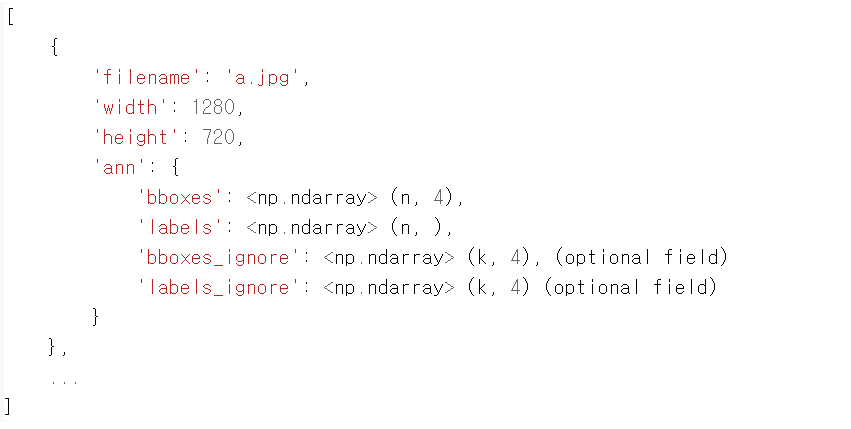


# 아래와 같이 되어있는 여러개 파일을 위에 말한 Format 형태로 바꿔줘야함
# (여러파일 annotation 파일 -> 한개 파일 annotation 형태로)

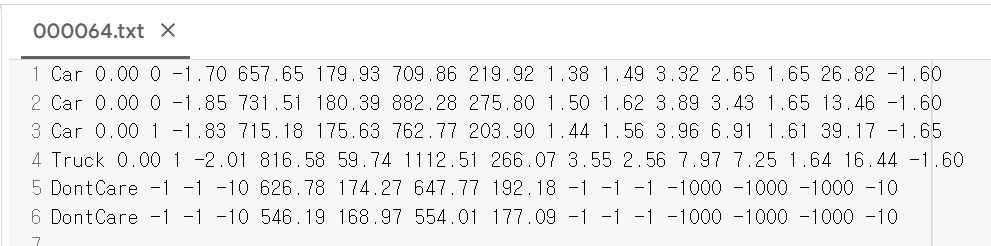

# 해당 포맷으로 바꾸기 위한 Class 선언

In [6]:
import copy
import os.path as osp
import cv2

import mmcv
from mmdet.apis import init_detector
from mmdet.apis import inference_detector
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_module(force=True)
class KittiTinyDataset(CustomDataset):
  CLASSES = ('Car', 'Truck', 'Pedestrian', 'Cyclist')

  ##### self.data_root: /content/kitti_tiny/ self.ann_file: /content/kitti_tiny/train.txt self.img_prefix: /content/kitti_tiny/training/image_2
  def load_annotations(self, ann_file):

    cat2label = {k:i for i, k in enumerate(self.CLASSES)}
    image_list = mmcv.list_from_file(self.ann_file)
    data_infos = []

    for image_id in image_list:
      filename = '{0:}{1:}.jpeg'.format(self.img_prefix, image_id)
      image = cv2.imread(filename)
      height, width = image.shape[:2]

      data_info = {'filename': str(image_id) + '.jpeg',
                    'width':width,
                    'height':height}

      label_prefix = self.img_prefix.replace('image_2', 'label_2')
      lines = mmcv.list_from_file(osp.join(label_prefix, str(image_id)+ '.txt'))
      content = [ line.strip().split(' ') for line in lines ]
      bbox_names = [x[0] for x in content]
      bboxes = [[float(info) for info in x[4:8]] for x in content]

      gt_bboxes = []
      gt_labels = []
      gt_bboxes_ignore = []
      gt_labels_ignore = []

      for bbox_name, bbox in zip(bbox_names, bboxes):
        if bbox_name in cat2label:
          gt_bboxes.append(bbox)
          gt_labels.append(cat2label[bbox_name])

        else:
          gt_bboxes_ignore.append(bbox)
          gt_labels_ignore.append(-1)

      data_anno = { 
        'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
        'labels': np.array(gt_labels, dtype=np.long),
        'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
        'labels_ignore': np.array(gt_labels_ignore, dtype=np.long)
      }

      data_info.update(ann=data_anno)
      # 전체 annotation 파일들에 대한 정보를 가지는 data_infos에 data_info Dict를 추가
      data_infos.append(data_info)

    return data_infos


* @ Decorator: 기존 함수를 입력 받아서 기능이 추가된 새로운 함수 객체로 만들어주는 역할을 합니다.

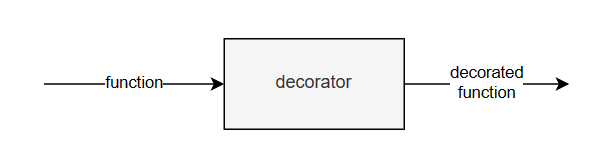

# 클래스 선언 정리하기

In [7]:
# 1. 클래스 선언하기 (Decorator를 사용해야함 우리가 필요한 일부분만 수정하면 되기 때문)

import mmcv
from mmdet.datasets.builder import DATASETS
from mmdet.datasets.custom import CustomDataset

@DATASETS.register_modul(force=True) # force는 나중에 dataset 재등록 사용하기 위한 파라미터
class KittiTinyDataset(CustomDataset):

In [8]:
# 2. label 정리하기

CLASSES = ('Car', 'Truck', 'Pedestrian', 'Cyclist')

In [ ]:
#3.load_annotations 함수 정의하기

def load_annotaitons(self, ann_file):
  cat2label = {k:i for i, k in enumerate(self.CLASSES)}
  image_list = mmcv.list_from_file(self.ann_file) # 이미지 파일 리스트로 변경경
  data_infos = []

  for image_id in image_list:
    filename = '{0:}{1:}.jpeg'.format(self.img_prefix, image_id) #cv2.imread를 위한 전체경로 구하기
    image = cv2.imread(filename) # 구한 경로 가지고 imread 활용해서 height, width 구하기
    height, width = image.shape[:2]

    data_info = {'filename': str(image_id) + '.jpeg',
                    'width':width,
                    'height':height}

    # bbox 좌표, class 값을 가지고 위한 부분 작성
    label_prefix = self.img_prefix.replace('image_2', 'label_2')
    lines = mmcv.list_from_file(osp.join(label_prefix, str(image_id) + '.txt'))
    
    # kkiti dataset은 공란으로 구분자가 되어 있으므로 분리리
    content = [ line.strip().split(' ') for line in lines ]

    # 첫번째 칼럼이 레이블 값이므로 bbox_name 클래스 추출
    bbox_names = [x[0] for x in content]
    # 5~8 값이 좌표 값이므로 해당 데이터 추출출
    bboxes = [[float(info) for info in x[4:8]] for x in content]

    gt_bboxes = []
    gt_labels = []
    gt_bboxes_ignore = []
    gt_labels_ignore = []

    # 사전에 정의한 label에 없는 값들은 ignore로 
    for bbox_name, bbox in zip(bbox_names, bboxes):
      if bbox_name in cat2label:
        gt_bboxes.append(bbox)
        gt_labels.append(cat2label[bbox_name])

      else:
        gt_bboxes_ignore.append(bbox)
        gt_labels_ignore.append(-1)

    data_anno = { 
      'bboxes': np.array(gt_bboxes, dtype=np.float32).reshape(-1, 4),
      'labels': np.array(gt_labels, dtype=np.long),
      'bboxes_ignore': np.array(gt_bboxes_ignore, dtype=np.float32).reshape(-1, 4),
      'labels_ignore': np.array(gt_labels_ignore, dtype=np.long)
    }

    data_info.update(ann=data_anno)
    # 전체 annotation 파일들에 대한 정보를 가지는 data_infos에 data_info Dict를 추가
    data_infos.append(data_info)

  return data_infos
